# Customer Analytics

This project was completed as a part of 365 Data Science Certificate Program.

In this project, we will begin with customer analytics to understand the correlations in the dataset. 

# Segmentation Data

We start with customer analytics by performing some initial exploration and visualization of the segmentation data set.
The segmentation data set contains customer information for 2000 individuals at a physical store. All data have been collected through the loyalty card when they check out. The dataset has been prerpocessed to protect customers' privacy.

The purpose of the segmentation is to find customer with similar background, so we can put them into groups. 

## Import Libraries and Dataset

In [46]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

# Load the customer segmentation dataset
df_segmentation = pd.read_csv('segmentation data.csv', index_col = 0)

## Data Exploration
In this section, we will begin exploring the data through visualizations and statistical analysis to understand how each feature is related to the others.
The dataset is composed of seven categories of customer information: 'Sex', 'Maritla status','Age','Education','Income','Occupation','Settlement size'. The code block below produces a statistical summary for each of the above categoies. 

In [2]:
# Display a selection of the dataset
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [3]:
# Display a description of the dataset
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [4]:
# Display the correlation between each feature. 
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


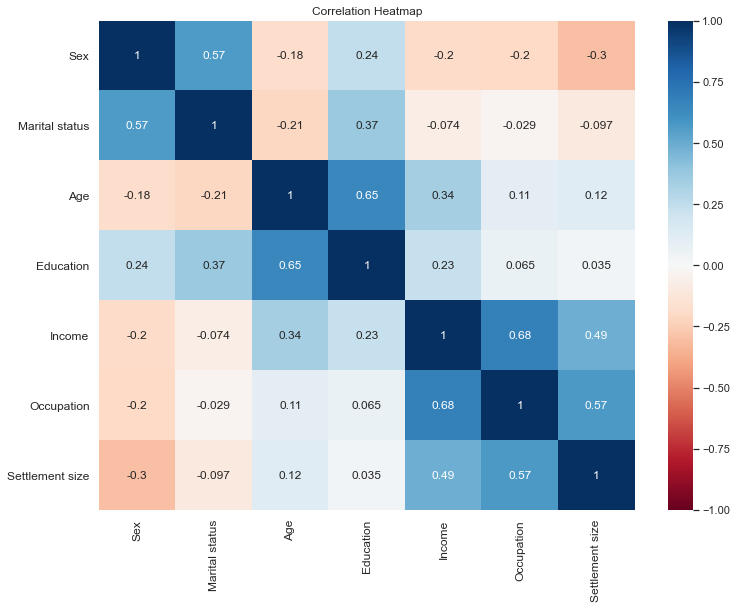

In [5]:
# Produce the correlation heatmap for each pair of features in the data
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

#### Correlations
Looking at the heatmap above, there are a few pairs of features that exhibit some degree of correlation. They include:
- Occupation and income
- education and age
- marital status and sex
- occupations and settlement size
- settlement size and income
- education and material status
- income and age



## Visualize Raw Data for Age and Income

Text(0.5, 1.0, 'Visualization of raw data')

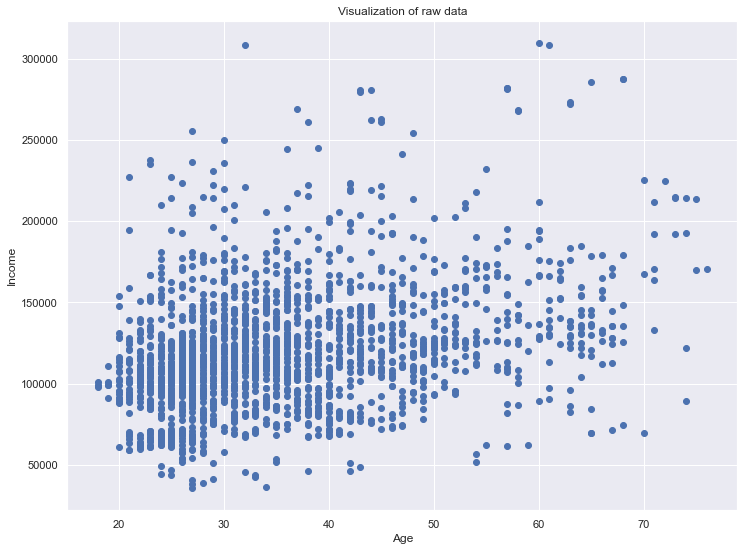

In [6]:
# This section, we just selected one pair that correlates to each other and we visualize the raw data to check the pattern.
plt.figure(figsize = (12,9))
plt.scatter(df_segmentation.iloc[:,2], df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## Standardization

In [7]:
# In order to make comparison and claffication, we need to standardize the data. 
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

# Hierarchical Clustering

We use aggolomerative (bottom up) approach to hierarchical cluster our data. We use 'WARD' method to calculate the distance between the cluster. The distance is calculated based on following equation:
Ward = ||cluster A - cluster B||^2/n

In [8]:
# Create the cluster
hier_clust = linkage(segmentation_std, method = 'ward')

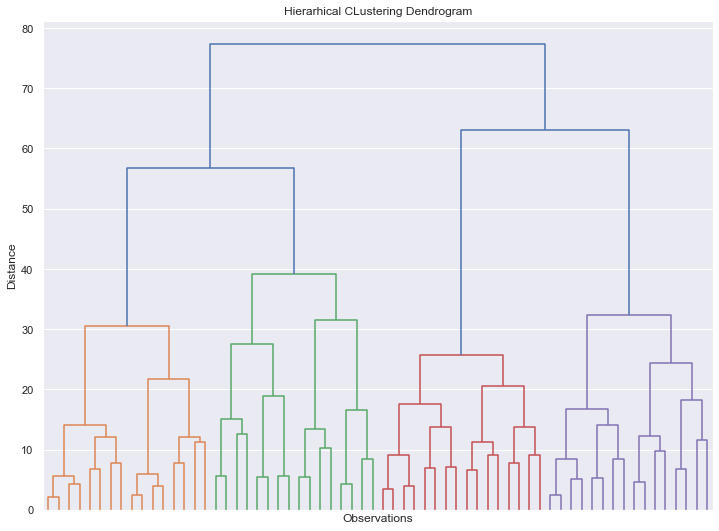

In [9]:
#Visualize the cluster in dendrogram with other five levels shown in the figure to make it easier to view.
plt.figure(figsize = (12,9))
plt.title('Hierarhical CLustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
          show_leaf_counts = False,
          no_labels = True)
plt.show()

To identify a horizontal line on the dendrogram to cut, we need to find the longest vertical line unintercepted by a horizontal line from the dendrogram. On this figure we identify on the second level, the second line from the left is the longest line that does not intercepted by a horizontal line. Therefore, this is the line that we will make the cut.

We can also identify the solution from the different color theme. 

Pros and cons of hierarchical clustering:
Pros: it finds the number of clusters, while other methods might require addition analysis to identify the optimal number of clusters.
Cons: it might take long time to run and it is computational complicated. 

We can start with hierarchical clustering to determine clusters, then move on to Flat clustering for segmentation. 

# K-means Clustering

K-means clustering is the most common approach for clustering. There are three steps for K-means clustering:

1. Choose nubmer of clusters (K=2)
2. Specify cluster seeds (Starting centroid)
3. Calculate the sentroid or the geometrical center

Cons of K-means clustering:
1. the squared euclidean distance is quite sensitive to outliers
2. need to choose the number of clustering to start

In [10]:
# use wcss to identify the optimal number of clustering
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

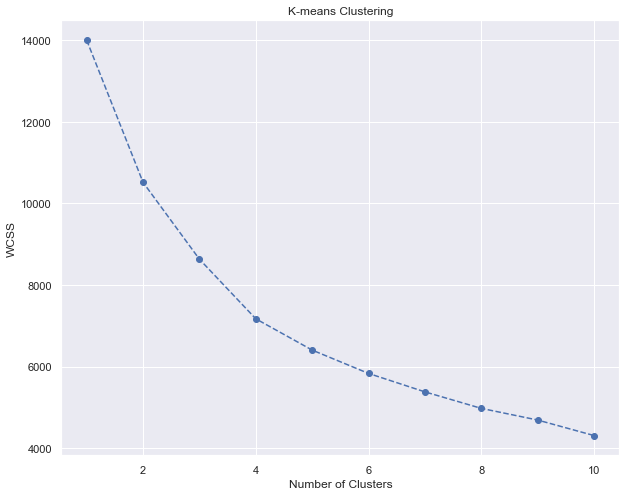

In [11]:
#plot the wcss
plt.figure(figsize = (10,8))
plt.plot(range(1,11),wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

From the figure, use 'Elbow' method, we identify the optimal number of clusters is 4, which is consistant with our result from dendrogram.

In [12]:
#use K-means clustering method to classify the dataset with four clusters.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

## Segmentation Results

In [13]:
# make a copy of the segmentation result
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

#calculate the segment mean
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


From this table above, we can identify the characteristics of different groups of people as follow:

1. The first group can be labeled as "well-off" type: Their average age is around 55 and have the highest income amoung four. 
2. The second group can be labeled as "Fewer-Opportunities": Their average age is around 35, living in the small city and have lowest income. 
3. The third group can be labeled as "Standard": They are usually married and have average income. Their average age is around 29.
4. The forth group can be labeled as "Career-Focused": They are mostly men and have higher income. They mostly live in big city. 

In [14]:
#count the number of obeservation in each segment
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [15]:
#rename the segment so it is easier to interpretate
df_segm_analysis.rename({0:'well-off',
                        1:'fewer-opportunities',
                        2:'standard',
                        3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
career focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [16]:
#map the segment names to the raw data
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off',
                                                                 1:'fewer opportunities',
                                                                 2:'standard',
                                                                 3:'career focused'})

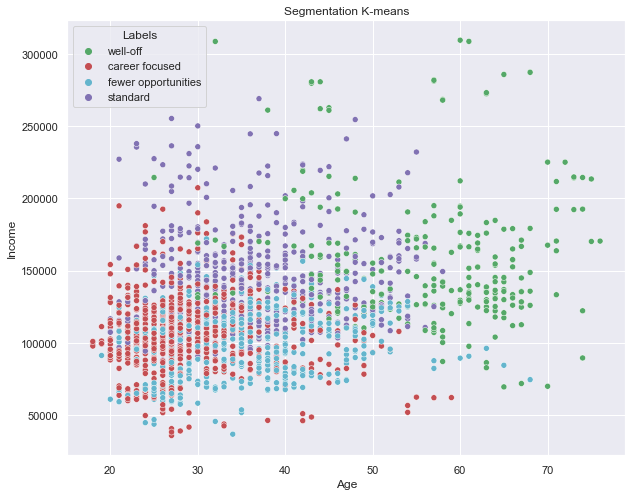

In [17]:
#create the plot to visualize the segmentation result
x = df_segm_kmeans['Age']
y = df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x, y = y, hue = df_segm_kmeans['Labels'], palette = ['g','r','c','m'])
plt.title('Segmentation K-means')
plt.show()

From this figure above, we can easily identify the well-off category colored in green. However, other three were harder to distinguish from the graph. 

The next step will be re-run the K-means clustering with PCA to enhance the separation of the three segment. 

## PCA
In this step, we will use Principal Component Analysis (PCA) to reduce the demention of our data set.

In [18]:
# apply PCA to our dataset
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [19]:
# PCA will create 7 variables based on the dataset and evaluate each one's importance. The total ratio adds up to 1. 
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumlative Explained Variance')

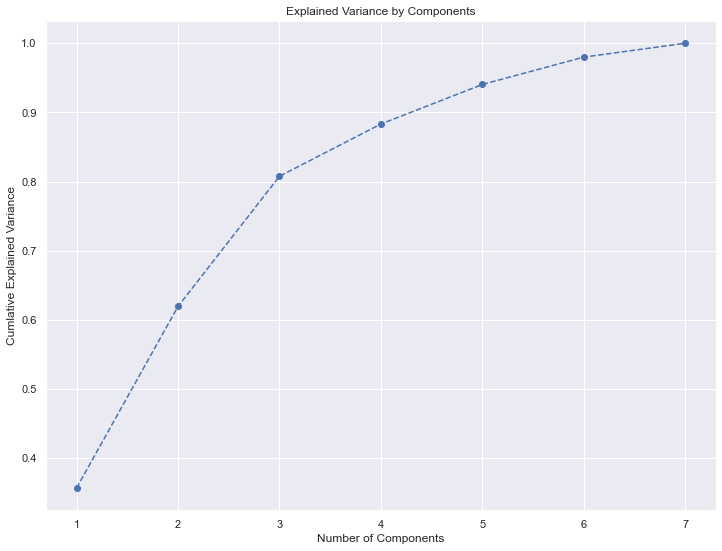

In [20]:
# visualize the cumulative explained variance
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumlative Explained Variance')

In the figure above, it means if we perserve 2 variables, we will perserve a little over 60% of the information. If we keep 3 variables, we will perserve 80% of the information. The rule of thumb is to keep at least 80% of the variance.In this case, we will chose 3 components.

In [21]:
#choose 3 components for our analysis
pca = PCA(n_components = 3)
pca.fit(segmentation_std)

PCA(n_components=3)

In [22]:
#PCA results below displays a 3 by 7 array. 
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

Each number is the the loading of each components in each variable. Loading is the correlation between an original variable and a component. 

In [23]:
# put the data into pandas dataframe to make it easier to be examined
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns = df_segmentation.columns.values,
                          index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x7fe4e00813d0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

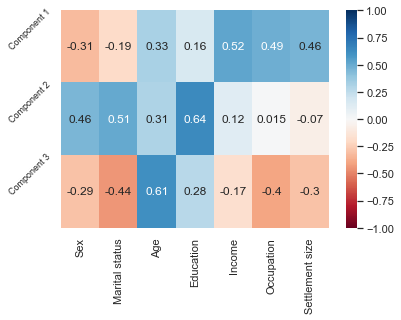

In [24]:
# create a heatmap to better visualize the results
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap = 'RdBu',
           annot = True)
plt.yticks([0,1,2],
          ['Component 1','Component 2','Component 3'],
          rotation = 45,
          fontsize = 9)

In [25]:
#transform the array to be a 7 by 3 array for K means analysis
scores_pca = pca.transform(segmentation_std)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

## K-means clustering with PCA

In [28]:
# use wcss to identify the optimal number of clustering
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

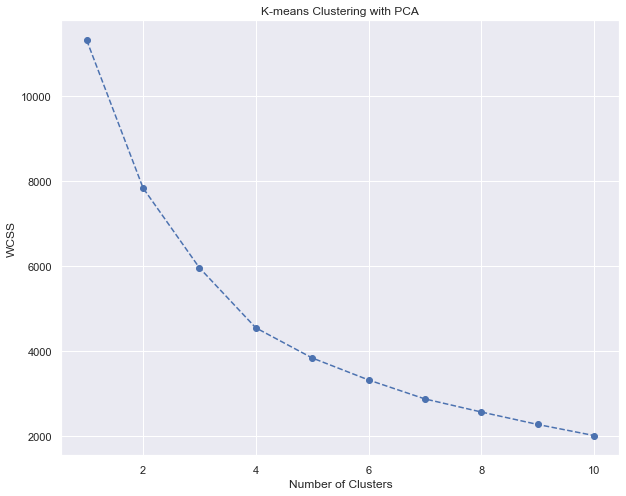

In [29]:
#plot the wcss
plt.figure(figsize = (10,8))
plt.plot(range(1,11),wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering with PCA')
plt.show()

The result is similiar to what we have before and we select 4 as the optimal clustering numbers. 

In [30]:
#use K-means clustering method to classify the dataset with four clusters.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

## K-means clustering with PCA results

In [32]:
# add the result of clustering to the original table
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)],axis = 1)
df_segm_pca_kmeans.columns.values[-3:] =['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [34]:
# calculate the mean values of each clustering
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446
1,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981
2,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269
3,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839


In [39]:
#count the number of obeservation in each segment and rename the segments.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs']/df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard',
                                                          1:'career focused',
                                                          2:'fewer-opportunities',
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446,NaN,NaN
career focused,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981,NaN,NaN
fewer-opportunities,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269,NaN,NaN
well-off,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839,NaN,NaN


In [41]:
#map the clustering results to raw data
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard',
                                                          1:'career focused',
                                                          2:'fewer-opportunities',
                                                          3:'well-off'})

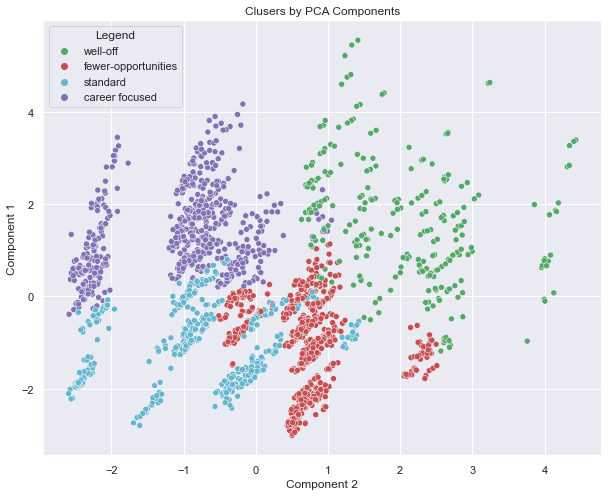

In [43]:
#create the plot to visualize the segmentation result
x = df_segm_pca_kmeans['Component 2']
y = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x, y = y, hue = df_segm_pca_kmeans['Legend'], palette = ['g','r','c','m'])
plt.title('Clusers by PCA Components')
plt.show()

PCA reduce the features numbers into components so it is easier to visualize. 

## Data Export

In [47]:
#export the data using pickle
pickle.dump(scaler, open('scaler.pickle','wb'))
pickle.dump(pca, open('pca.pickle','wb'))
pickle.dump(kmeans_pca, open('kmeans_pcs.pickle','wb'))